# EDA

## Preguntas y conocimiento de data

### Pasos previos
* Cuantas columnas se manejan?
* Eliminar columnas inutiles
* Transformar columnas, columnas True/False, one hot encoding?
* Separar la data entre Attrition y no-Attrition
* Calcular media de horario de entrada

### Preguntas
* cuantos empleados tiene la compañia?
* Describir la edad de los empleados
* Describir la distancia hacia el trabajo
* Describir salario mensual y aumento salarial del ultimo año
* Describir salario mensual vs educacion
* Describir salario mensual vs nivel de trabajo
* Describir la media de tiempo en la compañia
* Graficar calidad del ambiente, desempeño y balance vida-trabajo


In [64]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
employee_survey_df = pd.read_csv('data/employee_survey_data.csv')
general_df = pd.read_csv('data/general_data.csv')
in_time_df = pd.read_csv('data/in_time.csv')
out_time_df = pd.read_csv('data/out_time.csv')
manager_survey_df = pd.read_csv('data/manager_survey_data.csv')

In [3]:
survey_df = pd.merge(manager_survey_df, employee_survey_df, how='left', on = 'EmployeeID')
g_df = pd.merge(general_df,survey_df,how='left',on='EmployeeID')
del survey_df
del general_df

In [4]:
from datetime import datetime
import math
def average_hour_stats(data):
    dateAvg = []
    skipDayCount = 0
    for date in data:
        if type(date) == str:

            date = datetime.strptime(date, '%Y-%m-%d %H:%M:%S')
            date = date.hour*3600 + date.minute*60 + date.second
            dateAvg.append(date)
        elif np.isnan(date):
            skipDayCount+=1
            
    dateAvg = np.array(dateAvg)
    dateAvg = dateAvg.mean()
    
    return math.floor(dateAvg), skipDayCount

    
    

In [5]:
schedule_df = pd.DataFrame(columns=['EmployeeID','AvgTimeInSec','AvgTimeOutSec','AwayFromOfficeDays'])

In [6]:
for i in range(len(g_df.index)):
    avg_in, missing_in = average_hour_stats(in_time_df.iloc[i,1:])
    avg_out, missing_out = average_hour_stats(out_time_df.iloc[i,1:])
    row_df = pd.DataFrame([[i,avg_in,avg_out,max(missing_in,missing_out)]], columns=['EmployeeID','AvgTimeInSec','AvgTimeOutSec','AwayFromOfficeDays'])
    schedule_df = pd.concat([schedule_df,row_df], ignore_index=True)


In [7]:
schedule_df.head()


,EmployeeID,AvgTimeInSec,AvgTimeOutSec,AwayFromOfficeDays
0,0,36005,62550,29
1,1,35957,63745,25
2,2,36090,61337,19
3,3,35934,61831,26
4,4,35994,64816,16


In [8]:
g_df = pd.merge(g_df,schedule_df,how='left',on='EmployeeID')
del schedule_df

In [9]:
g_df.AvgTimeInSec = g_df.AvgTimeInSec.astype(np.float64)
g_df.AvgTimeOutSec = g_df.AvgTimeOutSec.astype(np.float64)
g_df.AwayFromOfficeDays = g_df.AwayFromOfficeDays.astype(np.float64)

In [10]:
g_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   object 
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [11]:
g_df.describe()

,Age,DistanceFromHome,Education,EmployeeCount,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,...,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,AvgTimeInSec,AvgTimeOutSec,AwayFromOfficeDays
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,4410.000000,...,4410.000000,4410.000000,4410.000000,4410.000000,4385.000000,4390.000000,4372.000000,4409.000000,4409.000000,4409.000000
mean,36.923810,9.192517,2.912925,1.0,2.063946,65029.312925,2.694830,15.209524,8.0,0.793878,...,2.187755,4.123129,2.729932,3.153741,2.723603,2.728246,2.761436,35999.386709,63722.499887,24.733726
std,9.133301,8.105026,1.023933,0.0,1.106689,47068.888559,2.498887,3.659108,0.0,0.851883,...,3.221699,3.567327,0.711400,0.360742,1.092756,1.101253,0.706245,65.315911,4826.037839,5.504028
min,18.000000,1.000000,1.000000,1.0,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,...,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1.000000,35775.000000,57422.000000,13.000000
25%,30.000000,2.000000,2.000000,1.0,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,...,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,35956.000000,59990.000000,20.000000
50%,36.000000,7.000000,3.000000,1.0,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,...,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,36000.000000,62670.000000,25.000000
75%,43.000000,14.000000,4.000000,1.0,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,...,3.000000,7.000000,3.000000,3.000000,4.000000,4.000000,3.000000,36042.000000,66100.000000,29.000000
max,60.000000,29.000000,5.000000,1.0,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,...,15.000000,17.000000,4.000000,4.000000,4.000000,4.000000,4.000000,36279.000000,75842.000000,36.000000


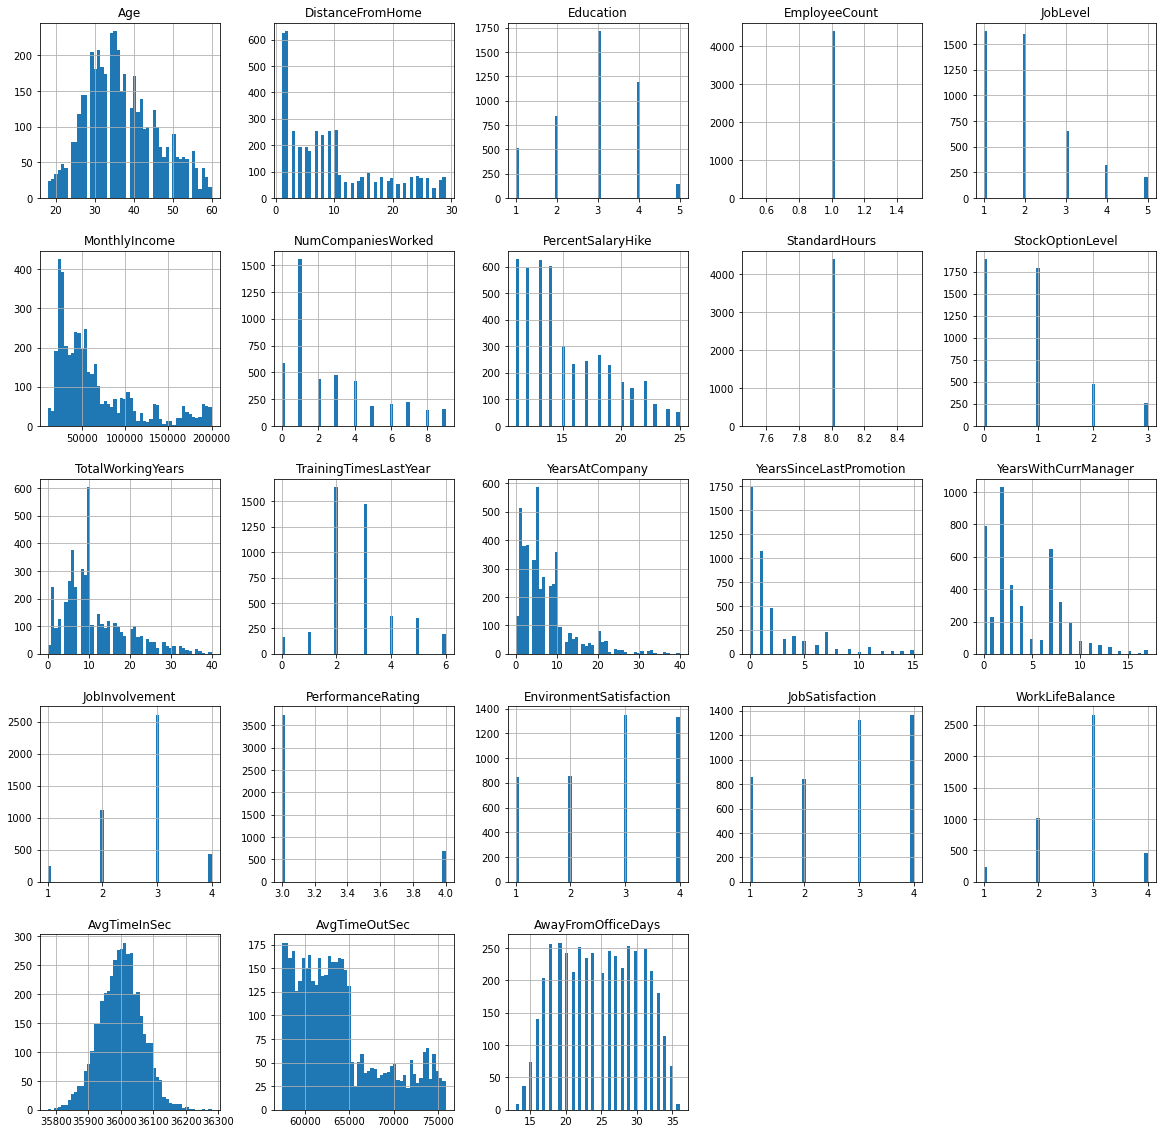

In [12]:
g_df.hist(bins=50, figsize=(20,20))
plt.show()

Existe data redundante o inutil?

In [13]:
g_df.StandardHours.describe()

count    4410.0
mean        8.0
std         0.0
min         8.0
25%         8.0
50%         8.0
75%         8.0
max         8.0
Name: StandardHours, dtype: float64

In [14]:
g_df.EmployeeCount.describe()

count    4410.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: EmployeeCount, dtype: float64

In [15]:
g_df.Over18.unique()

array(['Y'], dtype=object)

Se eliminan las variables que no ofrecen informacion distinta

In [16]:
g_df.drop('EmployeeCount', inplace=True, axis=1)
g_df.drop('Over18', inplace=True, axis=1)
g_df.drop('StandardHours', inplace=True, axis=1)

Que tipo de variables categoricas hay y cuales son sus valores?


In [17]:
g_df.BusinessTravel.unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [18]:
g_df.Department.unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [19]:
g_df.EducationField.unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [20]:
g_df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [21]:
g_df['Female'] = g_df['Gender'].map(
                   {'Female':1 ,'Male':0})
g_df.drop('Gender', inplace=True, axis=1)

In [22]:
g_df.JobRole.unique()

array(['Healthcare Representative', 'Research Scientist',
       'Sales Executive', 'Human Resources', 'Research Director',
       'Laboratory Technician', 'Manufacturing Director',
       'Sales Representative', 'Manager'], dtype=object)

In [23]:
g_df.MaritalStatus.unique()

array(['Married', 'Single', 'Divorced'], dtype=object)

In [24]:
g_df['Attrition'] = g_df['Attrition'].map(
                   {'Yes':1 ,'No':0})

In [25]:
g_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   int64  
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeID               4410 non-null   object 
 8   JobLevel                 4410 non-null   int64  
 9   JobRole                  4410 non-null   object 
 10  MaritalStatus            4410 non-null   object 
 11  MonthlyIncome            4410 non-null   int64  
 12  NumCompaniesWorked       4391 non-null   float64
 13  PercentSalaryHike        4410 non-null   int64  
 14  StockOptionLevel        

In [26]:
g_df.describe()

,Age,Attrition,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,...,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,AvgTimeInSec,AvgTimeOutSec,AwayFromOfficeDays,Female
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.000000,4401.000000,...,4410.000000,4410.000000,4410.000000,4385.000000,4390.000000,4372.000000,4409.000000,4409.000000,4409.000000,4410.000000
mean,36.923810,0.161224,9.192517,2.912925,2.063946,65029.312925,2.694830,15.209524,0.793878,11.279936,...,4.123129,2.729932,3.153741,2.723603,2.728246,2.761436,35999.386709,63722.499887,24.733726,0.400000
std,9.133301,0.367780,8.105026,1.023933,1.106689,47068.888559,2.498887,3.659108,0.851883,7.782222,...,3.567327,0.711400,0.360742,1.092756,1.101253,0.706245,65.315911,4826.037839,5.504028,0.489954
min,18.000000,0.000000,1.000000,1.000000,1.000000,10090.000000,0.000000,11.000000,0.000000,0.000000,...,0.000000,1.000000,3.000000,1.000000,1.000000,1.000000,35775.000000,57422.000000,13.000000,0.000000
25%,30.000000,0.000000,2.000000,2.000000,1.000000,29110.000000,1.000000,12.000000,0.000000,6.000000,...,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,35956.000000,59990.000000,20.000000,0.000000
50%,36.000000,0.000000,7.000000,3.000000,2.000000,49190.000000,2.000000,14.000000,1.000000,10.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,36000.000000,62670.000000,25.000000,0.000000
75%,43.000000,0.000000,14.000000,4.000000,3.000000,83800.000000,4.000000,18.000000,1.000000,15.000000,...,7.000000,3.000000,3.000000,4.000000,4.000000,3.000000,36042.000000,66100.000000,29.000000,1.000000
max,60.000000,1.000000,29.000000,5.000000,5.000000,199990.000000,9.000000,25.000000,3.000000,40.000000,...,17.000000,4.000000,4.000000,4.000000,4.000000,4.000000,36279.000000,75842.000000,36.000000,1.000000


## Visualizacion

¿Como si visualiza la edad de los empleados?

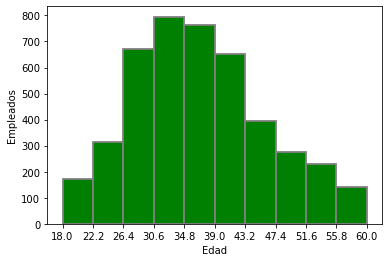

In [27]:
num_bins = 10
fig, ax = plt.subplots()
counts, bins, patches = ax.hist(g_df.Age, facecolor='green', edgecolor='gray', linewidth=1.8)
ax.set_xticks(bins)
ax.set_xlabel('Edad')
ax.set_ylabel('Empleados')
plt.show()


Que distancia recorren los empleados para ir al trabajo?

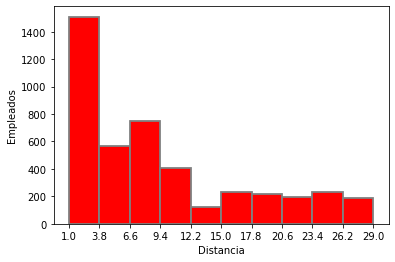

In [28]:
num_bins = 10
fig, ax = plt.subplots()
counts, bins, patches = ax.hist(g_df.DistanceFromHome, facecolor='red', edgecolor='gray', linewidth=1.8)
ax.set_xticks(bins)
ax.set_xlabel('Distancia')
ax.set_ylabel('Empleados')
plt.show()

Cuantos empleados ganan menos de 25.000?

In [29]:
g_df[g_df.MonthlyIncome<=25000].count()[0]

678

Cuantos empleados ganan más de 25.000 pero menos que 50.000?

In [30]:
g_df[(g_df.MonthlyIncome>25000) & (g_df.MonthlyIncome<=50000)].count()[0]

1569

Cuantos empleados ganan más de 50.000 pero menos que 75.000?

In [31]:
g_df[(g_df.MonthlyIncome>50000) & (g_df.MonthlyIncome<=75000)].count()[0]

930

In [32]:
g_df[(g_df.MonthlyIncome>75000) & (g_df.MonthlyIncome<=100000)].count()[0]

390

In [33]:
g_df[(g_df.MonthlyIncome>100000) & (g_df.MonthlyIncome<=125000)].count()[0]

273

In [34]:
g_df[(g_df.MonthlyIncome>125000) & (g_df.MonthlyIncome<=150000)].count()[0]

171

In [35]:
g_df[g_df.MonthlyIncome>150000].count()[0]

399

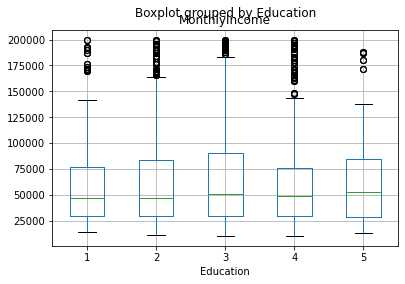

In [61]:
g_df.boxplot(column='MonthlyIncome',by='Education')
plt.show()


<AxesSubplot:title={'center':'MonthlyIncome'}, xlabel='JobLevel'>

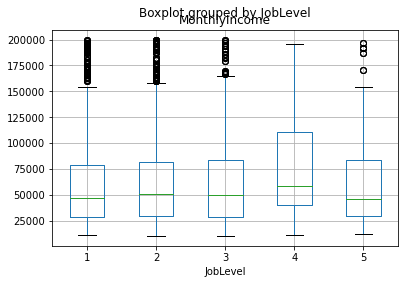

In [37]:
g_df.boxplot(column='MonthlyIncome',by='JobLevel')

In [38]:
exit_df = g_df[g_df.Attrition==1].groupby('Department').EmployeeID.count()

In [39]:
all_df = g_df.groupby('Department').EmployeeID.count()

In [40]:
#obtener totales
exit_df = exit_df/all_df


In [41]:
exit_df*100

Department
Human Resources           30.158730
Research & Development    15.712799
Sales                     15.022422
Name: EmployeeID, dtype: float64

In [42]:
#verificar porque HR tiene una rotacion del 30%
del exit_df
del all_df

In [43]:
g_df[g_df.Attrition==0].groupby('Department').EmployeeID.count()

Department
Human Resources            132
Research & Development    2430
Sales                     1137
Name: EmployeeID, dtype: int64

In [44]:
g_df[g_df.Attrition==1].groupby('Department').EmployeeID.count()

Department
Human Resources            57
Research & Development    453
Sales                     201
Name: EmployeeID, dtype: int64

In [45]:
g_df[g_df.Attrition==1].describe()

,Age,Attrition,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,...,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,AvgTimeInSec,AvgTimeOutSec,AwayFromOfficeDays,Female
count,711.000000,711.0,711.000000,711.000000,711.000000,711.000000,707.000000,711.000000,711.000000,709.000000,...,711.000000,711.000000,711.000000,706.000000,710.000000,707.000000,711.000000,711.000000,711.000000,711.000000
mean,33.607595,1.0,9.012658,2.877637,2.037975,61682.616034,2.936351,15.481013,0.780591,8.255289,...,2.852321,2.704641,3.172996,2.468839,2.470423,2.660537,35998.762307,63697.668073,24.385373,0.379747
std,9.675693,0.0,7.772368,1.014233,1.057485,44792.067695,2.678774,3.775289,0.858899,7.164018,...,3.138918,0.761739,0.378510,1.166807,1.115906,0.816377,63.231509,4688.977147,5.454602,0.485665
min,18.000000,1.0,1.000000,1.000000,1.000000,10090.000000,0.000000,11.000000,0.000000,0.000000,...,0.000000,1.000000,3.000000,1.000000,1.000000,1.000000,35811.000000,57422.000000,13.000000,0.000000
25%,28.000000,1.0,2.000000,2.000000,1.000000,28440.000000,1.000000,12.000000,0.000000,3.000000,...,0.000000,2.000000,3.000000,1.000000,1.000000,2.000000,35959.000000,60148.000000,20.000000,0.000000
50%,32.000000,1.0,7.000000,3.000000,2.000000,49080.000000,1.000000,14.000000,1.000000,7.000000,...,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,35999.000000,62907.000000,24.000000,0.000000
75%,39.000000,1.0,15.000000,4.000000,2.000000,71040.000000,5.000000,18.000000,1.000000,10.000000,...,5.000000,3.000000,3.000000,4.000000,3.000000,3.000000,36038.000000,65142.500000,29.000000,1.000000
max,58.000000,1.0,29.000000,5.000000,5.000000,198590.000000,9.000000,25.000000,3.000000,40.000000,...,14.000000,4.000000,4.000000,4.000000,4.000000,4.000000,36226.000000,75683.000000,36.000000,1.000000


In [46]:
g_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   int64  
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeID               4410 non-null   object 
 8   JobLevel                 4410 non-null   int64  
 9   JobRole                  4410 non-null   object 
 10  MaritalStatus            4410 non-null   object 
 11  MonthlyIncome            4410 non-null   int64  
 12  NumCompaniesWorked       4391 non-null   float64
 13  PercentSalaryHike        4410 non-null   int64  
 14  StockOptionLevel        

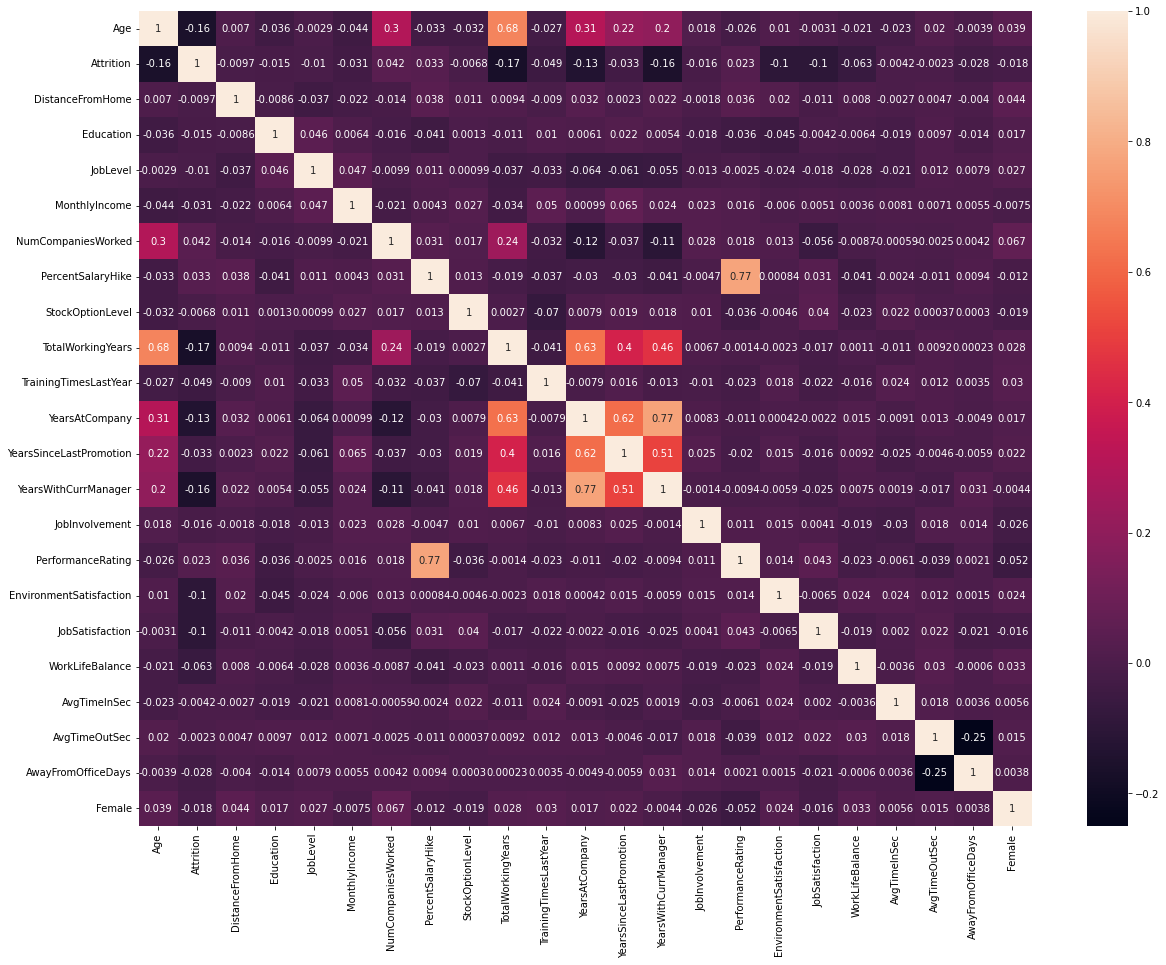

In [68]:
a4_dims = (20.0, 15.0)
fig, ax = plt.subplots(figsize=a4_dims)
corrMatrix = g_df.corr()
sn.heatmap(data=corrMatrix, ax=ax, annot=True)
plt.show()

Dibujar matriz de correlacion

In [48]:
g_df.to_pickle('employee_df.pkl')

### comparacion muestral personas que se fueron y los que se quedaron

In [49]:
g_a_df = g_df[g_df.Attrition==1]
g_af_df = g_df[g_df.Attrition==0]
g_a_df.drop('Attrition', inplace=True, axis=1)
g_af_df.drop('Attrition', inplace=True, axis=1)

C:\Users\luis_\AppData\Local\Temp/ipykernel_10696/2714398432.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g_a_df.drop('Attrition', inplace=True, axis=1)
C:\Users\luis_\AppData\Local\Temp/ipykernel_10696/2714398432.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g_af_df.drop('Attrition', inplace=True, axis=1)


In [50]:
g_a_df.count()[0]*100/g_af_df.count()[0]

19.221411192214113

In [51]:
g_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   int64  
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeID               4410 non-null   object 
 8   JobLevel                 4410 non-null   int64  
 9   JobRole                  4410 non-null   object 
 10  MaritalStatus            4410 non-null   object 
 11  MonthlyIncome            4410 non-null   int64  
 12  NumCompaniesWorked       4391 non-null   float64
 13  PercentSalaryHike        4410 non-null   int64  
 14  StockOptionLevel        

In [52]:
g_df.AvgTimeInSec.head()

0    35957.0
1    36090.0
2    35934.0
3    35994.0
4    35960.0
Name: AvgTimeInSec, dtype: float64

* Dibujar cada variable segun dataframe
* Dibujar la matriz de correlaciones de las variables

Que edad tienen los empleados

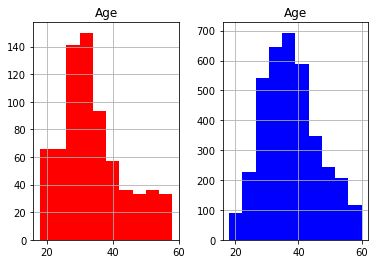

<Figure size 432x288 with 0 Axes>

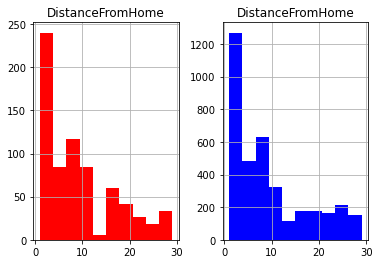

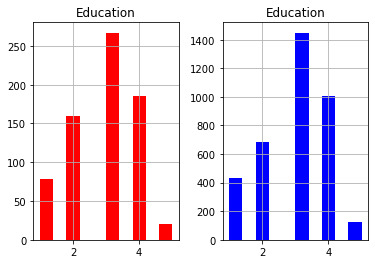

<Figure size 432x288 with 0 Axes>

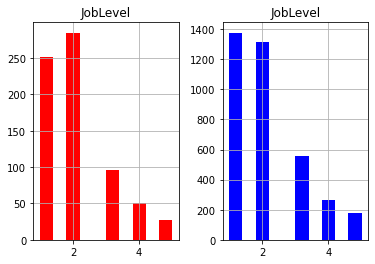

<Figure size 432x288 with 0 Axes>

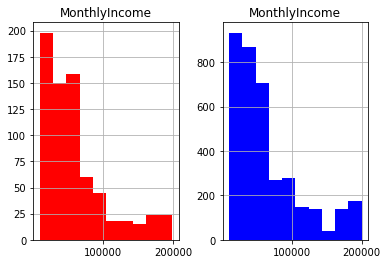

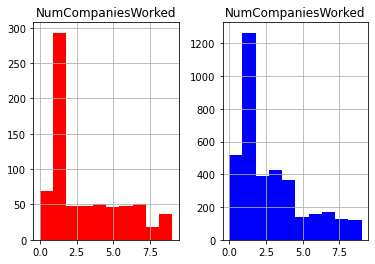

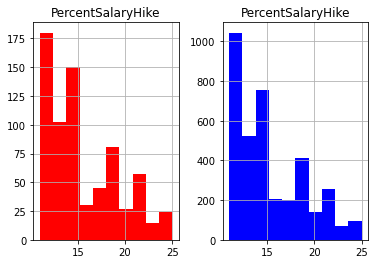

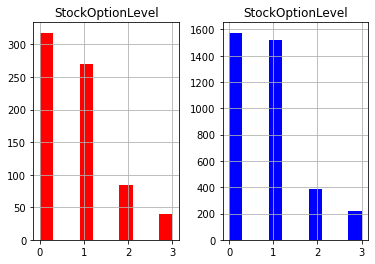

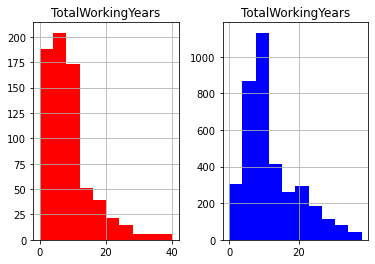

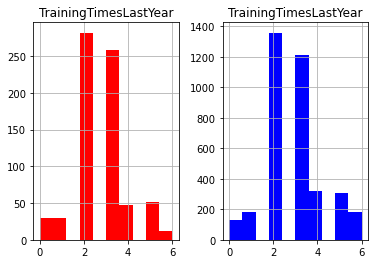

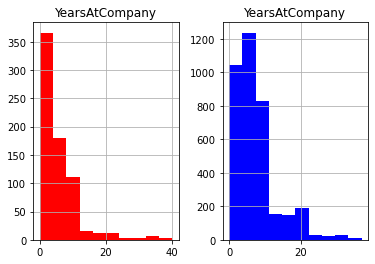

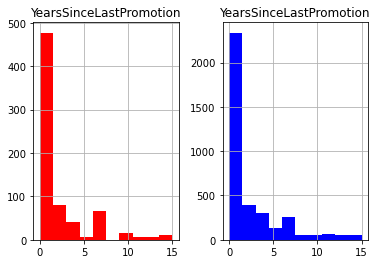

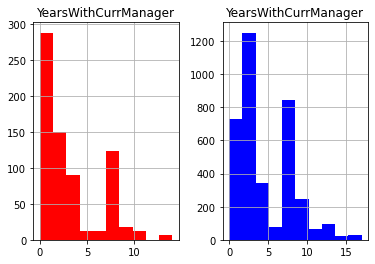

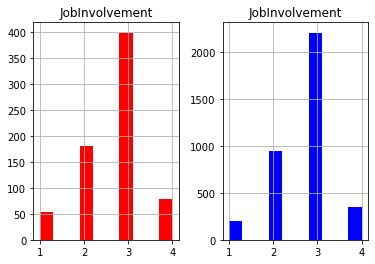

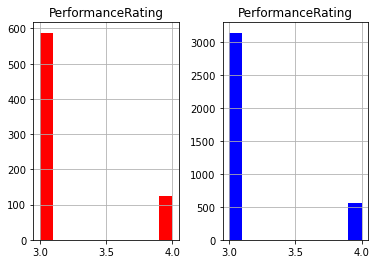

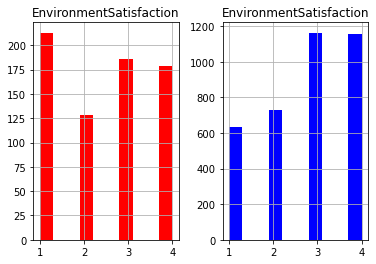

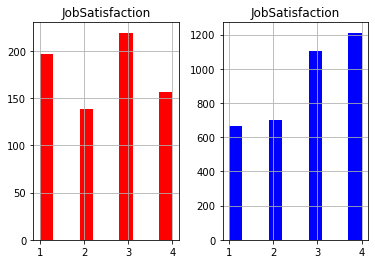

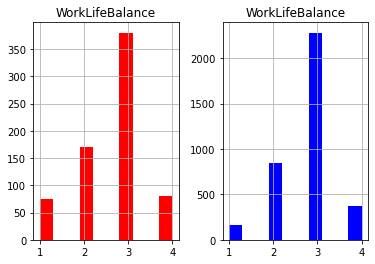

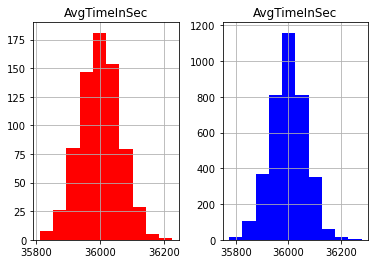

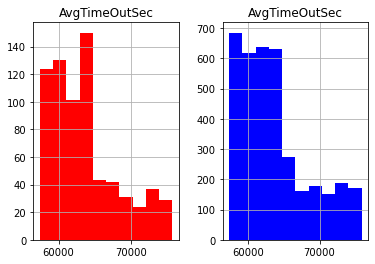

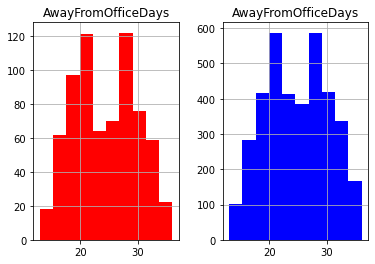

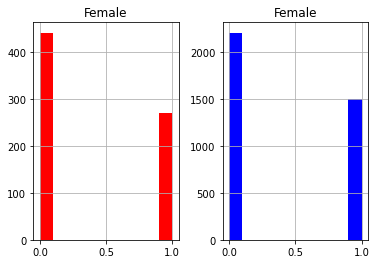

In [53]:
for (columnName) in g_a_df:
    fig, axes = plt.subplots(1, 2)
    try:
        g_a_df.hist(columnName, ax=axes[0],color='r')
        g_af_df.hist(columnName, ax=axes[1],color='b')
        plt.show()
    except:
        plt.close(fig)
        plt.clf()
        

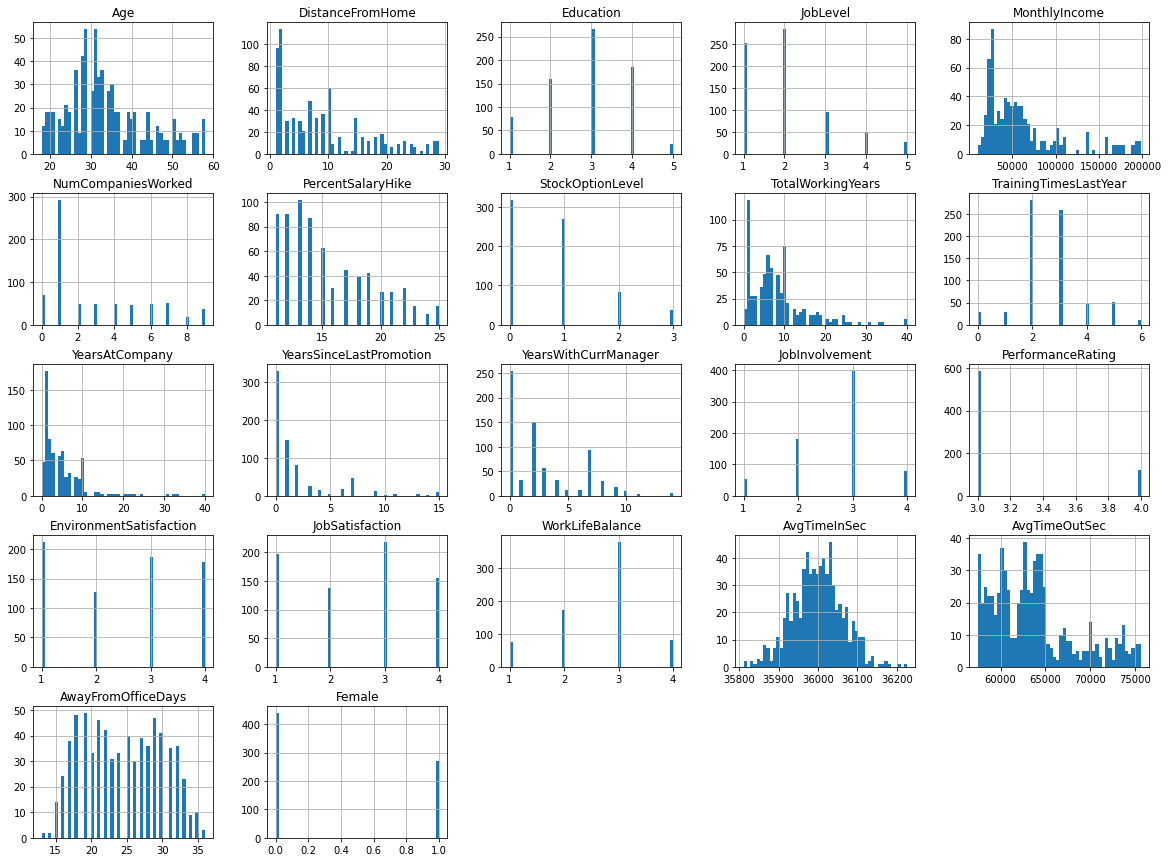

In [54]:
g_a_df.hist(bins=50, figsize=(20,15))
plt.show()

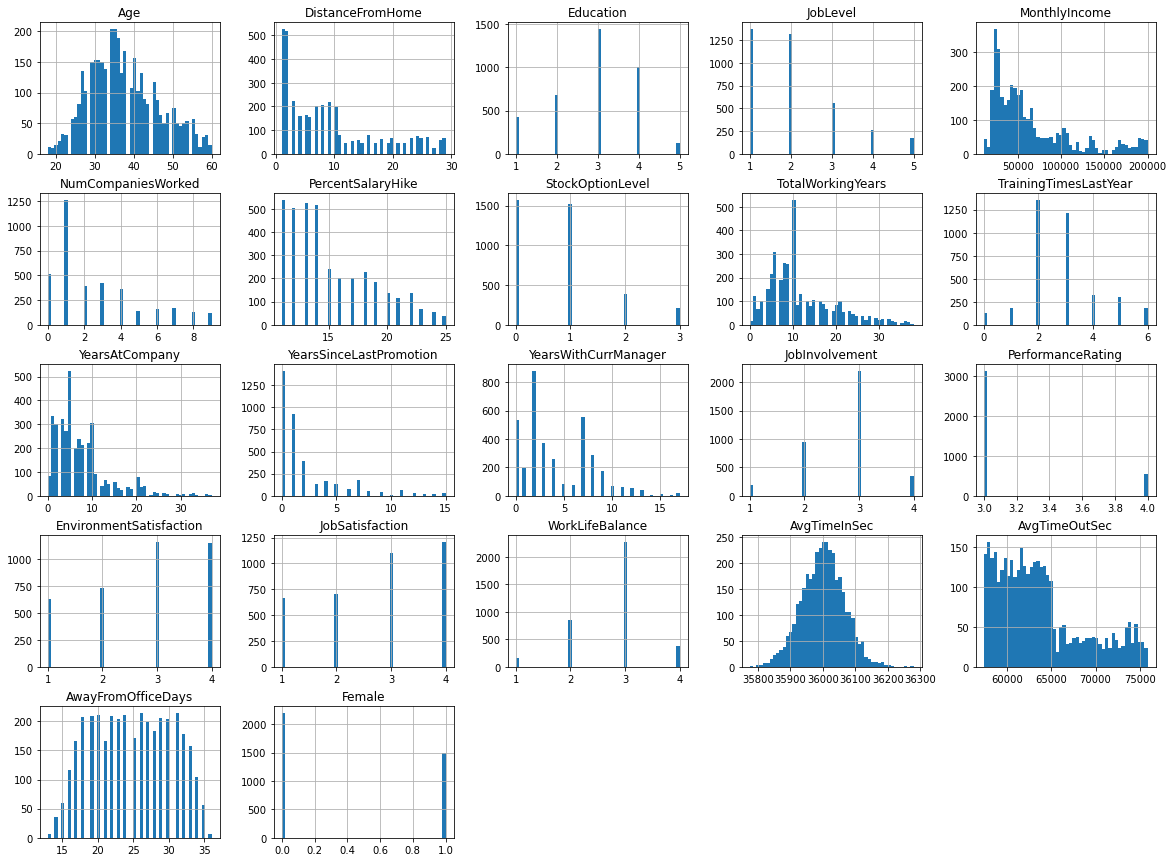

In [55]:
g_af_df.hist(bins=50, figsize=(20,15))
plt.show()

In [56]:
g_df.Age.describe()

count    4410.000000
mean       36.923810
std         9.133301
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

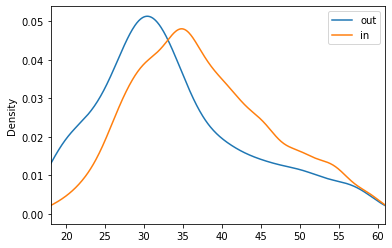

In [57]:
fig, ax = plt.subplots()

g_a_df.Age.plot(kind='density', ax=ax)
g_af_df.Age.plot(kind='density', ax=ax)
ax.legend(["out", "in"])
ax.set_xlim(18,61)
plt.show()


In [58]:
g_df.DistanceFromHome.describe()

count    4410.000000
mean        9.192517
std         8.105026
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: DistanceFromHome, dtype: float64

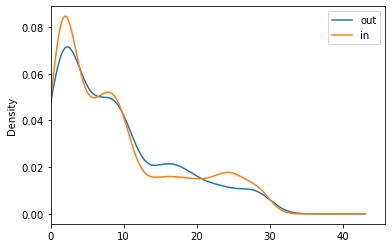

In [59]:
fig, ax = plt.subplots()

g_a_df.DistanceFromHome.plot(kind='density', ax=ax)
g_af_df.DistanceFromHome.plot(kind='density', ax=ax)
ax.legend(["out", "in"])
ax.set_xlim(0)
plt.show()

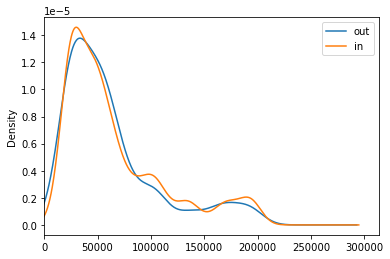

In [60]:
fig, ax = plt.subplots()

g_a_df.MonthlyIncome.plot(kind='density', ax=ax)
g_af_df.MonthlyIncome.plot(kind='density', ax=ax)
ax.legend(["out", "in"])
ax.set_xlim(0)
plt.show()